In [8]:
"imports"

import csv 
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,train_test_split, LeaveOneOut,cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt 


"load data set"

dataset = pd.read_csv("C:/Users/nibha/Desktop/syria.csv") 
X = dataset.drop('status', axis=1) # seperate features 
y = dataset['status'] #seperate label

"convert categorical classes"

z=dataset['deathdate'] 
need_dummies=X.drop('deathdate', axis=1) 
data_with_dummies= pd.get_dummies(need_dummies) 
X_features = pd.concat([ data_with_dummies,z], axis=1) #combine categorical and non categorial features 
X_features=np.asarray(X_features)

y = y.astype('category') 
y_target = y.cat.codes 
y_target=np.asarray(y_target) #class0-civilian



In [9]:
'method for contingency and other values'

def con(t_value,samples,target_pred_prob,y):
    target_pred=[]
    for j in range(samples):
      
        threshold=target_pred_prob[j]
        if (threshold<= t_value):
            target_pred.insert(j,1)
        else:
            target_pred.insert(j,0)
        
    tn, fp, fn, tp = confusion_matrix(y,target_pred).ravel() 
    
    sens= tp/(tp+fn) #True positive rate
    spec=tn/(fp+tn)
    fpr=100-(spec) #100-specificity
    acc=(tp+tn)/(tp+tn+fp+fn) 
    F1= (2*sens*spec)/(sens+spec) 
    
    return([tn,fp,fn,tp,sens,spec,fpr,acc,F1,target_pred])



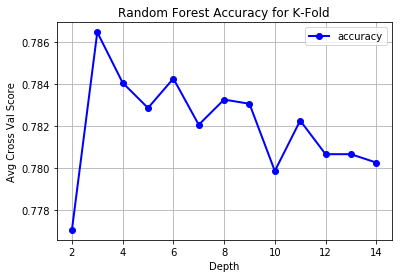

In [10]:
"k fold"

kf = KFold(n_splits=5) 

def k_model_epoch(n):
    target_pred=[]
    forest = RandomForestClassifier(n_estimators=n,max_features=3,random_state=1) 
    
    for train_index, test_index in kf.split(X_features):
    
        forest.fit(X_features[train_index], y_target[train_index])
        kftarget_pred_real = forest.predict(X_features[test_index])
    
    scores=cross_val_score(forest, X_features, y_target)
    avg_score=scores.mean()
    
    return (avg_score)


for i in range(1,13):
   
    k_model2= np.asarray([k_model_epoch(2)])
    k_model3= np.asarray([k_model_epoch(3)])
    k_model4= np.asarray([k_model_epoch(4)])
    k_model5= np.asarray([k_model_epoch(5)])
    k_model6= np.asarray([k_model_epoch(6)])
    k_model7= np.asarray([k_model_epoch(7)])
    k_model8= np.asarray([k_model_epoch(8)])    
    k_model9= np.asarray([k_model_epoch(9)])
    k_model10= np.asarray([k_model_epoch(10)])
    k_model11= np.asarray([k_model_epoch(11)])
    k_model12= np.asarray([k_model_epoch(12)])
    k_model13= np.asarray([k_model_epoch(13)])
    k_model14= np.asarray([k_model_epoch(14)])
    
n= [2,3,4,5,6,7,8,9,10,11,12,13,14] 

k_avg_score=([k_model2,k_model3,k_model4,k_model5,k_model6,k_model7,k_model8,k_model9,k_model10
            ,k_model11,k_model12,k_model13,k_model14])

fig=plt.figure()
ax = fig.add_subplot(111) 
ax.plot(n,k_avg_score, marker="o",c='blue', linewidth=2,label='accuracy')
ax.set(title='Random Forest Accuracy for K-Fold', ylabel='Avg Cross Val Score',xlabel='Depth')
ax.legend(loc='best') 
plt.grid()
plt.show()

# "build forest"

forest1 = RandomForestClassifier(n_estimators=3,max_features=3,random_state=1) 

for train_index, test_index in kf.split(X_features):
    
    forest1.fit(X_features[train_index], y_target[train_index])
    kftarget_pred_real = forest1.predict(X_features[test_index])
    
    
kftarget_pred_prob = forest1.predict_proba(X_features)[:,0]

samples=len(X_features)
kf_thresh0=con(0,samples,kftarget_pred_prob,y_target)
kf_thresh1=con(0.25,samples,kftarget_pred_prob,y_target)
kf_thresh2=con(0.5,samples,kftarget_pred_prob,y_target)
kf_thresh3=con(0.75,samples,kftarget_pred_prob,y_target)
kf_thresh4=con(1,samples,kftarget_pred_prob,y_target)

"ROC CURVE"

x_k_fpr=[kf_thresh0[6],kf_thresh1[6],kf_thresh2[6],kf_thresh3[6],kf_thresh4[6]] #fpr or 100-specificty
print(x_k_fpr)
y_k_tpr=[kf_thresh0[4],kf_thresh1[4],kf_thresh2[4],kf_thresh3[4],kf_thresh4[4]] #sensitivity
print(y_k_tpr)
k_auc=roc_auc_score(y_target,kftarget_pred_prob)
print(k_auc)

plt.title('ROC Curve for Random Forest K Fold')
plt.plot(x_k_fpr,y_k_tpr, color='aqua',lw=2, label='(AUC = %0.2f)' % k_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# print(kf_thresh0[0],kf_thresh0[1],kf_thresh0[2],kf_thresh0[3],kf_thresh0[4],
#       kf_thresh0[5],kf_thresh0[6],kf_thresh0[7])
# output >3755 12 1065 165 0.134146341463 0.9968144412 0.784470682409 0.236469756431#tn,fp,fn,tp,sens,spec,acc,F1,
# print(kf_thresh1[0],kf_thresh1[1],kf_thresh1[2],kf_thresh1[3],kf_thresh1[4]
#       ,kf_thresh1[5],kf_thresh1[6],kf_thresh1[7])
# output>3715 52 889 341 0.277235772358 0.986195911866 0.811687012207 0.432803433278
# print(kf_thresh2[0],kf_thresh2[1],kf_thresh2[2],kf_thresh2[3],kf_thresh2[4]
#        ,kf_thresh2[5],kf_thresh2[6],kf_thresh2[7])
# output>3495 272 548 682 0.554471544715 0.927794000531 0.835901540925 0.694120394692
# print(kf_thresh3[0],kf_thresh3[1],kf_thresh3[2],kf_thresh3[3],kf_thresh3[4]
#        ,kf_thresh3[5],kf_thresh3[6],kf_thresh3[7])
# output>2998 769 189 1041 0.846341463415 0.79585877356 0.808284970983 0.820324177187
# print(kf_thresh4[0],kf_thresh4[1],kf_thresh4[2],kf_thresh4[3],kf_thresh4[4]
#        ,kf_thresh4[5],kf_thresh4[6],kf_thresh4[7])
# output>0 3767 0 1230 1.0 0.0 0.246147688613 0.0


[99.000530926466681, 99.018316963100617, 99.08919564640297, 99.203875763206796, 100.0]
[0.17317073170731706, 0.38211382113821141, 0.70487804878048776, 0.88861788617886184, 1.0]
0.0754586794607


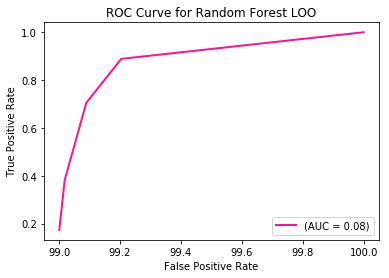

In [6]:
"Leave one out"

loo = LeaveOneOut()
loo.get_n_splits(X_features)


"epoch curve"

def l_model_epoch(n):
   
    forest = RandomForestClassifier(n_estimators=n,max_features=3,random_state=1) 
    
    for train_index, test_index in loo.split(X_features):
    
        forest.fit(X_features[train_index], y_target[train_index])
        lootarget_pred_real = forest.predict(X_features[test_index])
    
   
    scores=cross_val_score(forest, X_features, y_target)
    avg_score=scores.mean()
    
   
      
    return (avg_score)

l_model2= np.asarray([l_model_epoch(2)])
l_model3= np.asarray([l_model_epoch(3)])

for i in range(1,12):
   
    l_model3= np.asarray([l_model_epoch(3)])
    l_model4= np.asarray([l_model_epoch(4)])
    l_model5= np.asarray([l_model_epoch(5)])
    l_model6= np.asarray([l_model_epoch(6)])
    l_model7= np.asarray([l_model_epoch(7)])
    l_model8= np.asarray([l_model_epoch(8)])    
    l_model9= np.asarray([l_model_epoch(9)])
    l_model10= np.asarray([l_model_epoch(10)])
    l_model11= np.asarray([l_model_epoch(11)])
    l_model12= np.asarray([l_model_epoch(12)])
    l_model13= np.asarray([l_model_epoch(13)])
    l_model14= np.asarray([l_model_epoch(14)])

    
n= [2,3,4,5,6,7,8,9,10,11,12,13,14] 

l_avg_score=([l_model2,l_model3,l_model4,l_model5,l_model6,l_model7,l_model8,l_model9,l_model10
            ,l_model11,l_model12,l_model13,l_model14])

fig=plt.figure()
ax = fig.add_subplot(111) 

ax.plot(n,l_avg_score, marker="o",c='blue', linewidth=2,label='accuracy')
ax.set(title='Random Forest Accuracy for LOO', ylabel='Accuracy',xlabel='Depth')
ax.legend(loc='best') 
plt.grid()
plt.show()

forest2 = RandomForestClassifier(n_estimators=3,max_features=3,random_state=1) 


for train_index, test_index in loo.split(X_features):
    
    forest2.fit(X_features[train_index], y_target[train_index])
    lootarget_pred_real = forest2.predict(X_features[test_index])
    
    

lootarget_pred_prob = forest2.predict_proba(X_features)[:,0]

samples=len(X_features)
loo_thresh0=con(0,samples,lootarget_pred_prob,y_target)
loo_thresh1=con(0.25,samples,lootarget_pred_prob,y_target)
loo_thresh2=con(0.5,samples,lootarget_pred_prob,y_target)
loo_thresh3=con(0.75,samples,lootarget_pred_prob,y_target)
loo_thresh4=con(1,samples,lootarget_pred_prob,y_target)

"ROC CURVE"

x_l_fpr=[loo_thresh0[6],loo_thresh1[6],loo_thresh2[6],loo_thresh3[6],loo_thresh4[6]] #fpr or 100-specificty
print(x_l_fpr)
y_l_tpr=[loo_thresh0[4],loo_thresh1[4],loo_thresh2[4],loo_thresh3[4],loo_thresh4[4]] #sensitivity
print(y_l_tpr)
l_auc=roc_auc_score(y_target,lootarget_pred_prob)
print(l_auc)

plt.title('ROC Curve for Random Forest LOO')
plt.plot(x_l_fpr,y_l_tpr, color='deeppink',lw=2, label='(AUC = %0.2f)' % l_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# print(loo_thresh0[0],loo_thresh0[1],loo_thresh0[2],loo_thresh0[3],loo_thresh0[4],
#       loo_thresh0[5],loo_thresh0[6],loo_thresh0[7])
# # output >3765 2 1017 213 0.173170731707 0.999469073533 0.796077646588 0.295195148602#tn,fp,fn,tp,sens,spec,acc,F1,
# print(loo_thresh1[0],loo_thresh1[1],loo_thresh1[2],loo_thresh1[3],loo_thresh1[4]
#       ,loo_thresh1[5],loo_thresh1[6],loo_thresh1[7])
# # output>3698 69 760 470 0.382113821138 0.981683036899 0.834100460276 0.550103417771
# print(loo_thresh2[0],loo_thresh2[1],loo_thresh2[2],loo_thresh2[3],loo_thresh2[4]
#        ,loo_thresh2[5],loo_thresh2[6],loo_thresh2[7])
# # output>3431 336 363 867 0.70487804878 0.910804353597 0.860116069642 0.794718064193
# print(loo_thresh3[0],loo_thresh3[1],loo_thresh3[2],loo_thresh3[3],loo_thresh3[4]
#        ,loo_thresh3[5],loo_thresh3[6],loo_thresh3[7])
# # output>2999 768 137 1093 0.888617886179 0.796124236793 0.818891334801 0.839832074937
# print(loo_thresh4[0],loo_thresh4[1],loo_thresh4[2],loo_thresh4[3],loo_thresh4[4]
#        ,loo_thresh4[5],loo_thresh4[6],loo_thresh4[7])
# # output>0 3767 0 1230 1.0 0.0 0.246147688613 0.0


[99.01187335092348, 99.040897097625333, 99.110817941952504, 99.245382585751983, 100.0]
[0.13636363636363635, 0.3512396694214876, 0.63636363636363635, 0.83884297520661155, 1.0]
0.125675985085


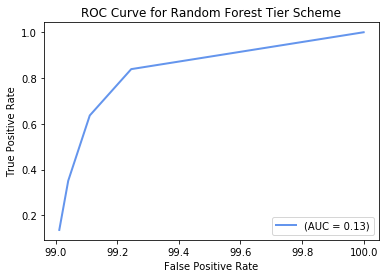

In [7]:
"3 tier scheme "

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_features, y_target, test_size= 0.2,random_state=2)

#split train+validation set into train set and validation set 
X_train, X_valid, y_train, y_valid =train_test_split(X_trainval, y_trainval, test_size= 0.2,random_state=2)

"epoch like curve"

def t_model_epoch(n):
    target_pred=[]
    forest =RandomForestClassifier(n_estimators=n,max_features=3,random_state=1) 
    forest.fit(X_train, y_train) # train on train+validation set
    forest.fit(X_trainval, y_trainval) #train on training set
    train_acc=forest.score(X_trainval, y_trainval)
    test_acc=forest.score(X_test,y_test)       
    return ([train_acc,test_acc])


for i in range(1,12):
   
    t_model3= np.asarray([t_model_epoch(3)])
    t_model4= np.asarray([t_model_epoch(4)])
    t_model5= np.asarray([t_model_epoch(5)])
    t_model6= np.asarray([t_model_epoch(6)])
    t_model7= np.asarray([t_model_epoch(7)])
    t_model8= np.asarray([t_model_epoch(8)])    
    t_model9= np.asarray([t_model_epoch(9)])
    t_model10= np.asarray([t_model_epoch(10)])
    t_model11= np.asarray([t_model_epoch(11)])
    t_model12= np.asarray([t_model_epoch(12)])
    t_model13= np.asarray([t_model_epoch(13)])
    t_model14= np.asarray([t_model_epoch(14)])
    
n= [3,4,5,6,7,8,9,10,11,12,13,14]

y_train_acc=([t_model3[0,0],t_model4[0,0],t_model5[0,0],t_model6[0,0],t_model7[0,0],t_model8[0,0]
            ,t_model9[0,0],t_model10[0,0],t_model11[0,0],t_model12[0,0],t_model13[0,0],t_model14[0,0],])
y_test_acc=([t_model3[0,1],t_model4[0,1],t_model5[0,1],t_model6[0,1],t_model7[0,1],t_model8[0,1]
            ,t_model9[0,1],t_model10[0,1],t_model11[0,1],t_model12[0,1],t_model13[0,1],t_model14[0,1]])

fig=plt.figure()
ax = fig.add_subplot(111) 
ax.plot(n,y_train_acc,marker="o",c='green', linewidth=2, label='training accuracy')
ax.plot(n,y_test_acc, marker="o",c='blue', linewidth=2,label='testing accuracy')
ax.set(title='Random Forest Accuracy for Tier', ylabel='Accuracy',xlabel='Depth')
ax.legend(loc='best') 
plt.grid()
plt.show()

"create forest"

forest3 = RandomForestClassifier(n_estimators=7,max_features=3,random_state=1) 

forest3.fit(X_train, y_train) # train on train+validation set
forest3.fit(X_trainval, y_trainval) #train on training set


tiertarget_pred_real=forest3.predict(X_test)
tiertarget_pred_prob = forest3.predict_proba(X_test)[:,0]

tsamples=len(X_test)
tier_thresh0=con(0,tsamples,tiertarget_pred_prob,y_test)
tier_thresh1=con(0.25,tsamples,tiertarget_pred_prob,y_test)
tier_thresh2=con(0.5,tsamples,tiertarget_pred_prob,y_test)
tier_thresh3=con(0.75,tsamples,tiertarget_pred_prob,y_test)
tier_thresh4=con(1,tsamples,tiertarget_pred_prob,y_test)

"ROC CURVE"

x_t_fpr=[tier_thresh0[6],tier_thresh1[6],tier_thresh2[6],tier_thresh3[6],tier_thresh4[6]] #fpr or 100-specificty
print(x_t_fpr)
y_t_tpr=[tier_thresh0[4],tier_thresh1[4],tier_thresh2[4],tier_thresh3[4],tier_thresh4[4]] #sensitivity
print(y_t_tpr)
t_auc=roc_auc_score(y_test,tiertarget_pred_prob)
print(t_auc)

plt.title('ROC Curve for Random Forest Tier Scheme')
plt.plot(x_t_fpr,y_t_tpr, color='cornflowerblue',lw=2, label='(AUC = %0.2f)' % t_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# print(tier_thresh0[0],tier_thresh0[1],tier_thresh0[2],tier_thresh0[3],tier_thresh0[4],
#       tier_thresh0[5],tier_thresh0[6],tier_thresh0[7])
# # output >749 9 209 33 0.136363636364 0.988126649077 0.782 0.23965443686
# print(tier_thresh1[0],tier_thresh1[1],tier_thresh1[2],tier_thresh1[3],tier_thresh1[4],
#       tier_thresh1[5],tier_thresh1[6],tier_thresh1[7])
# # output>727 31 157 85 0.351239669421 0.959102902375 0.812 0.514178495948
# print(tier_thresh2[0],tier_thresh2[1],tier_thresh2[2],tier_thresh2[3],tier_thresh2[4]
#        ,tier_thresh2[5],tier_thresh2[6],tier_thresh2[7])
# # output>674 84 88 154 0.636363636364 0.889182058047 0.828 0.741823899371
# print(tier_thresh3[0],tier_thresh3[1],tier_thresh3[2],tier_thresh3[3],tier_thresh3[4]
#        ,tier_thresh3[5],tier_thresh3[6],tier_thresh3[7])
# # output>572 186 39 203 0.838842975207 0.754617414248 0.775 0.794504238825]
# print(tier_thresh4[0],tier_thresh4[1],tier_thresh4[2],tier_thresh4[3],tier_thresh4[4]
#        ,tier_thresh4[5],tier_thresh4[6],tier_thresh4[7])      
# # output>0 758 0 242 1.0 0.0 0.242 0.0


33 85 154 203 242
749 727 674 572 0
9 31 84 186 758
209 157 88 39 0


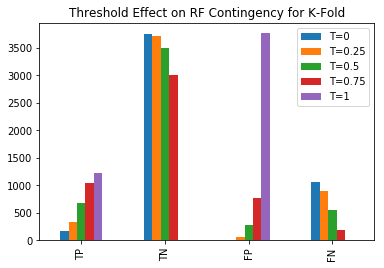

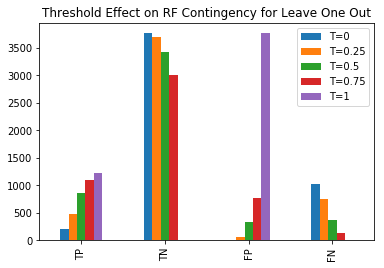

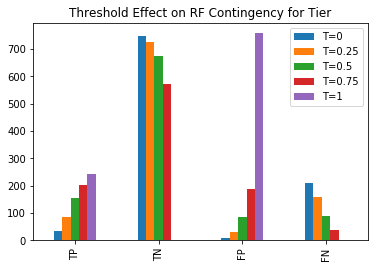

In [25]:
"bar graph for k fold"

groups1 ={'TP':[kf_thresh0[3],kf_thresh1[3],kf_thresh2[3],kf_thresh3[3],kf_thresh4[3]],
          'TN':[kf_thresh0[0],kf_thresh1[0],kf_thresh2[0],kf_thresh3[0],kf_thresh4[0]],
          'FP':[kf_thresh0[1],kf_thresh1[1],kf_thresh2[1],kf_thresh3[1],kf_thresh4[1]],
           'FN':[kf_thresh0[2],kf_thresh1[2],kf_thresh2[2],kf_thresh3[2],kf_thresh4[2]]}
                                           
# print(kf_thresh0[3],kf_thresh1[3],kf_thresh2[3],kf_thresh3[3],kf_thresh4[3])
# print(kf_thresh0[0],kf_thresh1[0],kf_thresh2[0],kf_thresh3[0],kf_thresh4[0])
# print(kf_thresh0[1],kf_thresh1[1],kf_thresh2[1],kf_thresh3[1],kf_thresh4[1])
# print(kf_thresh0[2],kf_thresh1[2],kf_thresh2[2],kf_thresh3[2],kf_thresh4[2])

# Convert data to pandas DataFrame.
df1=pd.DataFrame(groups1,columns= ['TP', 'TN', 'FP', 'FN']).T

ax1 = df1.plot(kind='bar', title='Threshold Effect on RF Contingency for K-Fold')
ax1.legend(['T=0','T=0.25','T=0.5','T=0.75','T=1']);

"bar graph for loo"

groups2 ={'TP':[loo_thresh0[3],loo_thresh1[3],loo_thresh2[3],loo_thresh3[3],loo_thresh4[3]],
          'TN':[loo_thresh0[0],loo_thresh1[0],loo_thresh2[0],loo_thresh3[0],loo_thresh4[0]],
          'FP':[loo_thresh0[1],loo_thresh1[1],loo_thresh2[1],loo_thresh3[1],loo_thresh4[1]],
           'FN':[loo_thresh0[2],loo_thresh1[2],loo_thresh2[2],loo_thresh3[2],loo_thresh4[2]]}
                                           
# print(loo_thresh0[3],loo_thresh1[3],loo_thresh2[3],loo_thresh3[3],loo_thresh4[3])
# print(loo_thresh0[0],loo_thresh1[0],loo_thresh2[0],loo_thresh3[0],loo_thresh4[0])
# print(loo_thresh0[1],loo_thresh1[1],loo_thresh2[1],loo_thresh3[1],loo_thresh4[1])
# print(loo_thresh0[2],loo_thresh1[2],loo_thresh2[2],loo_thresh3[2],loo_thresh4[2])

# Convert data to pandas DataFrame.
df2=pd.DataFrame(groups2,columns= ['TP', 'TN', 'FP', 'FN']).T

ax2 = df2.plot(kind='bar', title='Threshold Effect on RF Contingency for Leave One Out')
ax2.legend(['T=0','T=0.25','T=0.5','T=0.75','T=1']);

"bar graph for tier"

groups3 ={'TP':[tier_thresh0[3],tier_thresh1[3],tier_thresh2[3],tier_thresh3[3],tier_thresh4[3]],
          'TN':[tier_thresh0[0],tier_thresh1[0],tier_thresh2[0],tier_thresh3[0],tier_thresh4[0]],
          'FP':[tier_thresh0[1],tier_thresh1[1],tier_thresh2[1],tier_thresh3[1],tier_thresh4[1]],
           'FN':[tier_thresh0[2],tier_thresh1[2],tier_thresh2[2],tier_thresh3[2],tier_thresh4[2]]}
                                           
print(tier_thresh0[3],tier_thresh1[3],tier_thresh2[3],tier_thresh3[3],tier_thresh4[3])
print(tier_thresh0[0],tier_thresh1[0],tier_thresh2[0],tier_thresh3[0],tier_thresh4[0])
print(tier_thresh0[1],tier_thresh1[1],tier_thresh2[1],tier_thresh3[1],tier_thresh4[1])
print(tier_thresh0[2],tier_thresh1[2],tier_thresh2[2],tier_thresh3[2],tier_thresh4[2])

# Convert data to pandas DataFrame.
df3=pd.DataFrame(groups3,columns= ['TP', 'TN', 'FP', 'FN']).T

ax3 = df3.plot(kind='bar', title='Threshold Effect on RF Contingency for Tier')
ax3.legend(['T=0','T=0.25','T=0.5','T=0.75','T=1']);
